## <font color='green'>Setup 1</font>: Envrionment Setup & Import Data

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import time
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
warnings.filterwarnings('ignore')

enc = OneHotEncoder()
path =  '../web/dataset/'
train = pd.read_csv(path+'train.csv')
vali = pd.read_csv(path+'validation.csv')
test = pd.read_csv(path+'test.csv')
start_time = time.time()

## <font color='green'>Setup 2</font>: CTR on train set

In [7]:
base_ctr = train['click'].value_counts(normalize = True)[1]
base_ctr

0.0007539649884458758

In [8]:
ad_ctr = []
ad_name = [1458,3476,3427,3358,2259,2821,3386,2997,2261]
for i in ad_name:
    ad_ctr.append(train['click'][train['advertiser']==i].value_counts(normalize = True)[1])
ad_ctr

[0.00083473226564105031,
 0.00050464562342478474,
 0.00074884754565216914,
 0.00076448084204447765,
 0.00030658545558598702,
 0.00062225602378400803,
 0.0007180766777520589,
 0.0046066034099877034,
 0.00030675100937663219]

In [9]:
train['win']=train.bidprice-train.payprice
train['winbid']= 1
train['winbid'][train['win']<=0]=0
train=train.drop(['win'],axis=1)

In [10]:
#bids
train['advertiser'].value_counts(),len(train)

(1458    540293
 3386    498554
 3427    454031
 3476    346778
 3358    304782
 2821    231416
 2259    146778
 2261    120619
 2997     54487
 Name: advertiser, dtype: int64, 2697738)

In [11]:
# impression
train['winbid'].groupby([train['advertiser']]).sum(),train['winbid'].sum()

(advertiser
 1458    539445
 2259    146710
 2261    120562
 2821    231300
 2997     54459
 3358    289290
 3386    497815
 3427    439416
 3476    342042
 Name: winbid, dtype: int64, 2661039)

In [12]:
#win ratio
train['winbid'].groupby([train['advertiser']]).mean(),train['winbid'].mean()

(advertiser
 1458    0.998430
 2259    0.999537
 2261    0.999527
 2821    0.999499
 2997    0.999486
 3358    0.949170
 3386    0.998518
 3427    0.967811
 3476    0.986343
 Name: winbid, dtype: float64, 0.9863963809680555)

In [13]:
#click
train['click'].groupby([train['advertiser']]).sum(),train['click'].sum()

(advertiser
 1458    451
 2259     45
 2261     37
 2821    144
 2997    251
 3358    233
 3386    358
 3427    340
 3476    175
 Name: click, dtype: int64, 2034)

In [14]:
#click ratio
train['click'][train['winbid']==1].groupby([train['advertiser']]).mean(),train['click'][train['winbid']==1].mean()

(advertiser
 1458    0.000832
 2259    0.000307
 2261    0.000307
 2821    0.000623
 2997    0.004591
 3358    0.000702
 3386    0.000717
 3427    0.000735
 3476    0.000506
 Name: click, dtype: float64, 0.0007444460603546209)

In [15]:
#cost
train['payprice'][train['winbid']==1].groupby([train['advertiser']]).sum(),train['payprice'][train['winbid']==1].sum()

(advertiser
 1458    36976839
 2259    13629289
 2261    10772496
 2821    20592019
 2997     3405471
 3358    24359407
 3386    38119328
 3427    33212431
 3476    26280158
 Name: payprice, dtype: int64, 207347438)

## On Validation set

In [16]:
vali['win']=vali.bidprice-vali.payprice
vali['winbid']= 1
vali['winbid'][vali['win']<=0]=0
vali=vali.drop(['win'],axis=1)

In [17]:
#bids
vali['advertiser'].value_counts(),len(vali)

(1458    60025
 3386    55196
 3427    50381
 3476    38839
 3358    33853
 2821    25632
 2259    16419
 2261    13370
 2997     6034
 Name: advertiser, dtype: int64, 299749)

In [18]:
# impression
vali['winbid'].groupby([vali['advertiser']]).sum(),vali['winbid'].sum()

(advertiser
 1458    59940
 2259    16415
 2261    13365
 2821    25620
 2997     6034
 3358    32137
 3386    55097
 3427    48781
 3476    38322
 Name: winbid, dtype: int64, 295711)

In [19]:
#click
vali['click'].groupby([vali['advertiser']]).sum(),vali['click'].sum()

(advertiser
 1458    50
 2259    11
 2261     5
 2821    16
 2997    26
 3358    27
 3386    33
 3427    45
 3476    13
 Name: click, dtype: int64, 226)

In [20]:
#cost
vali['payprice'][vali['winbid']==1].groupby([vali['advertiser']]).sum(),vali['payprice'][vali['winbid']==1].sum()

(advertiser
 1458    4113685
 2259    1518481
 2261    1194779
 2821    2277958
 2997     387384
 3358    2705925
 3386    4225766
 3427    3682514
 3476    2931344
 Name: payprice, dtype: int64, 23037836)

In [21]:
a=train['click'][train['winbid']==1].groupby([train['weekday']]).mean()
b=train['click'][train['winbid']==1].groupby([train['advertiser'], train['weekday']]).mean()[1458]

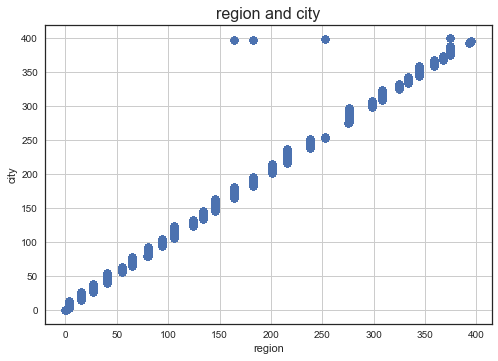

In [22]:
import matplotlib.pyplot as plt
plt.title('region and city', fontsize=16)
plt.xlabel('region')
plt.ylabel('city')
plt.scatter(x=train['region'].values,y=train['city'].values)
# plt.xlim(1000,30000)
# plt.ylim(10,200)
plt.grid(True)
plt.show()

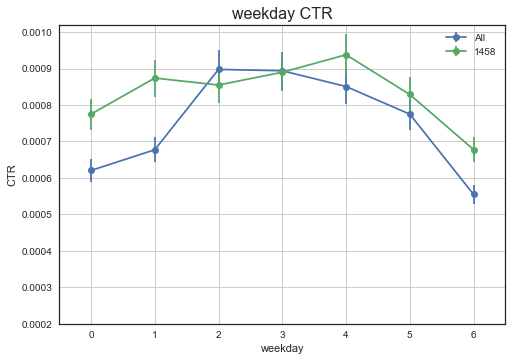

In [23]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.title('weekday CTR', fontsize=16)
plt.xlabel('weekday')
plt.ylabel('CTR')

a1=train['click'][train['winbid']==1].groupby([train['weekday']]).mean()
a2=train['click'][train['winbid']==1].groupby([train['advertiser'], train['weekday']]).mean()[1458]
err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
Time=list(range(7))
plt.errorbar(Time,a1,yerr=err1,fmt='o-',label='All')
plt.errorbar(Time,a2,yerr=err2,fmt='o-',label='1458')
plt.grid(True)
plt.axis([-0.5, 6.5, 0.0002, 0.00102])

# fig.savefig('weekday_CTR.jpg')
plt.xticks(np.arange(0, 7))
plt.legend(loc='upper right')
plt.show()
fig.savefig('weekday_CTR.eps')

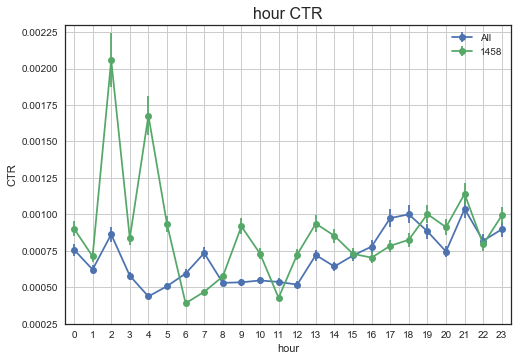

In [24]:
fig = plt.figure()
plt.title('hour CTR', fontsize=16)
plt.xlabel('hour')
plt.ylabel('CTR')

a1=train['click'][train['winbid']==1].groupby([train['hour']]).mean()
a2=train['click'][train['winbid']==1].groupby([train['advertiser'], train['hour']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
Time=list(range(24))
plt.errorbar(Time,a1,yerr=err1,fmt='o-' ,label='All')
plt.errorbar(Time,a2,yerr=err2,fmt='o-',label='1458')
plt.grid(True)
plt.axis([-0.5, 23.5, 0.00025, 0.0023])
plt.xticks(np.arange(0, 24))
plt.legend(loc='upper right')
plt.show()
fig.savefig('hour_CTR.eps')

## <font color='green'>Setup 3</font>:  Feature Extraction

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
def one_hot_encode_tags(df):
    df.usertag=df.usertag.str.replace(","," ")
    vect = CountVectorizer()
    X = vect.fit_transform(df.usertag)
    df=df.join(pd.DataFrame(X.toarray(), columns=vect.get_feature_names()))
    #df.drop("usertag",axis=1,inplace=True)
    return df

In [26]:
def preprocessing_data(data):
    os_name = ['windows','android','mac','other','linux','ios']
    data["OS"] = float('NaN')
    j=0
    for i in (os_name):
        data["OS"][data['useragent'].map(lambda x: x.split('_')[0])==i] = os_name[j]
        j +=1
    
    browser_name = ['ie','chrome','safari','firefox','other','theworld','maxthon','opera','sogou']
    data["Browser"] = float('NaN')
    j=0
    for i in (browser_name):
        data["Browser"][data['useragent'].map(lambda x: x.split('_')[1])==i] = browser_name[j]
        j +=1

    
    data["IPaddress"] = float('NaN')
    data["IPaddress"][data["IP"].map(lambda x: x.split('.')[0]).astype(float)<= 255]='E'
    data["IPaddress"][data['IP'].map(lambda x: x.split('.')[0]).astype(float)<= 239]='D'
    data["IPaddress"][data['IP'].map(lambda x: x.split('.')[0]).astype(float)<= 223]='C'
    data["IPaddress"][data['IP'].map(lambda x: x.split('.')[0]).astype(float)<= 191]='B'
    data["IPaddress"][data['IP'].map(lambda x: x.split('.')[0]).astype(float)<= 126]='A'
    
#     data["slotsize"] = data['slotwidth']*data['slotheight']
#     data["city_id"]= data.region.astype(str).str.cat(data.city.astype(str), sep=':')
    data["slotsize"]= data.slotwidth.astype(str).str.cat(data.slotheight.astype(str), sep='*')
    
    data["slotprice_range"] = 0
    data["slotprice_range"][data["slotprice"]>0]='1-10'
    data["slotprice_range"][data["slotprice"]>10]='11-50'
    data["slotprice_range"][data["slotprice"]>50]='51-100'
    data["slotprice_range"][data["slotprice"]>100]='101+'
    
 
    str_to_int_new_slot_v = {'0':0,'2':2,'1':1,'255':255,'Na':0,'FirstView':1,'SecondView':2,'ThirdView':3,'FourthView':4,'FifthView':5,'OtherView':6}
    data['slotvisibility'] = data['slotvisibility'].map(str_to_int_new_slot_v)#.astype(int)
      
    str_to_int_slotformat = {'0':0,'1':1,'5':5,'Na':0}
    data['slotformat'] = data['slotformat'].map(str_to_int_slotformat)
    
    str_to_int_adexchange = {'null':0,'1':1,'2':2,'3':3,'4':4}
    data['adexchange'] = data['adexchange'].map(str_to_int_adexchange)
    
    
    bidprice = data['bidprice']
    payprice = data['payprice']
    click = data['click']
    
    ad = []
    for i in ad_name:
        ad.append(data.loc[data['advertiser'].isin([i])])
        
#     usertag = data['usertag']
#     aaa = usertag.str.get_dummies(sep = ',')
#     data = data.drop('usertag',1)
#     data = data.drop(['click','bidprice','payprice','slotprice','bidid','userid','useragent','domain','IP','url','urlid','city','slotid','slotwidth','slotheight','creative'],axis=1)
#     bbb = pd.get_dummies(data)
#     onehot = pd.concat([bbb,aaa],axis = 1, join_axes = [bbb.index])
    
#     return data,click,ad,bidprice, payprice
    return data,bidprice,payprice

## <font color='green'>Setup 4</font>: Define Train/Validation Sets

In [27]:
train_data,train_bidprice,train_payprice = preprocessing_data(train)

In [28]:
train_data.head()

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,payprice,keypage,advertiser,usertag,winbid,OS,Browser,IPaddress,slotsize,slotprice_range
0,0,1,14,fdfae6789b787899f1b875de3ab8b21a,1,u_Vh1OPkFv3q5CFdR,windows_ie,180.107.112.*,80,85,...,54,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063",1,windows,ie,B,468*60,1-10
1,0,2,20,372883147cdefbc495fb5082f79dde9b,1,u_VhkRL6dCOTLsq-c,windows_chrome,125.120.199.*,94,95,...,42,15b749127478946f161a54dc0dad27c8,3476,"10063,10111",1,windows,chrome,A,250*250,1-10
2,0,5,9,2912cb5947e1fad450e2473c2f61ef75,1,u_VhkyORMrD8TP3GL,windows_ie,120.196.64.*,216,217,...,76,bebefa5efe83beee17a3d245e7c5085b,1458,10063,1,windows,ie,A,336*280,0
3,0,2,20,d7b7d61d1e50e1d27d210928d28a9b61,1,u_VhkyLRqVL2a4eWL,windows_ie,219.131.122.*,216,221,...,182,0f951a030abdaedd733ee8d114ce2944,3427,"10077,10111",1,windows,ie,C,728*90,101+
4,0,6,9,657d317dc4045bb79c2652abbea07530,1,u_Vh1zOJuQOtTCBgL,windows_chrome,123.190.78.*,40,48,...,34,a3becb967c015e9acb5e72f22b100ef8,3476,"10031,13042,10006,10057,13866,10063,14273,1005...",1,windows,chrome,A,950*90,0


Equipment feature (PC/Phone)

In [29]:
#os_name = ['windows','android','mac','other','linux','ios']
train_data["equipment"]='other'
PC_name=['windows','mac','linux']
phone_name=['android','ios']

for i in (PC_name):
    train_data['equipment'][train_data["OS"]==i] = 'PC'

for i in (phone_name):
     train_data['equipment'][train_data["OS"]==i] = 'phone'

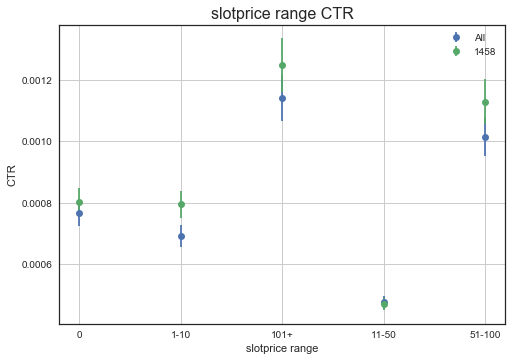

In [30]:
plt.xlabel('slotprice range')
plt.ylabel('CTR')
plt.title('slotprice range CTR', fontsize=16)

a1=train_data['click'][train_data['winbid']==1].groupby([train_data['slotprice_range']]).mean()
a2=train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['slotprice_range']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
y=list(range(5))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(5),a1.index)
plt.legend(loc='upper right')
plt.show()

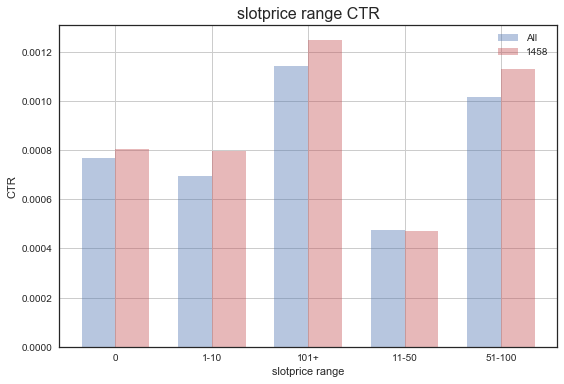

In [31]:
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
slotprice_range=train_data['click'][train_data['winbid']==1].groupby([train_data['slotprice_range']]).mean()
rects1 = plt.bar(index,slotprice_range.values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='All')
rects2 = plt.bar(index + bar_width, train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['slotprice_range']]).mean()[1458], bar_width,
                 alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('slotprice range')
plt.ylabel('CTR')
plt.title('slotprice range CTR', fontsize=16)
plt.xticks(index + bar_width / 2, slotprice_range.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

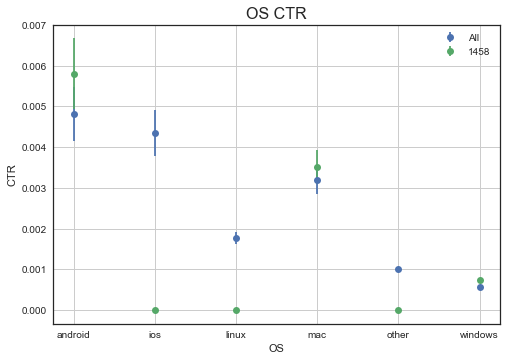

In [32]:
fig = plt.figure()
plt.xlabel('OS')
plt.ylabel('CTR')
plt.title('OS CTR', fontsize=16)

a1=train_data['click'][train_data['winbid']==1].groupby([train_data['OS']]).mean()
a2=train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['OS']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
y=list(range(6))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(6),a1.index)
plt.legend(loc='upper right')
plt.show()
fig.savefig('OS_CTR.eps')

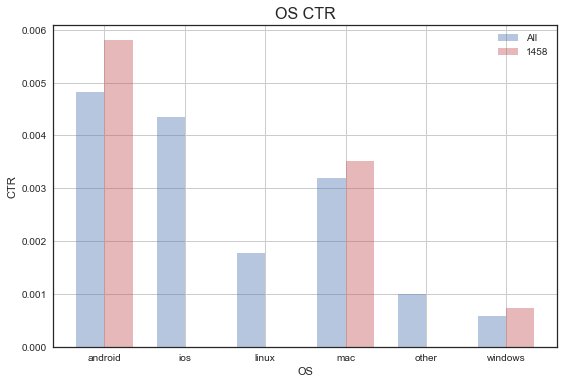

In [33]:
n_groups = 6
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
OS=train_data['click'][train_data['winbid']==1].groupby([train_data['OS']]).mean()
rects1 = plt.bar(index, OS.values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='All')
rects2 = plt.bar(index + bar_width, train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['OS']]).mean()[1458], bar_width,
                 alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('OS')
plt.ylabel('CTR')
plt.title('OS CTR', fontsize=16)
plt.xticks(index + bar_width / 2, OS.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
# def add_labels(rects):
#     for rect in rects:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

# add_labels(rects1)
# add_labels(rects2)
plt.show()

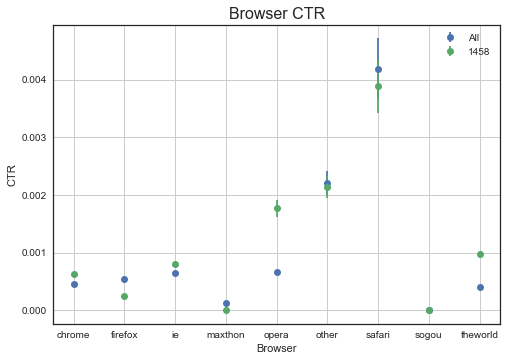

In [34]:
fig = plt.figure()
plt.xlabel('Browser')
plt.ylabel('CTR')
plt.title('Browser CTR', fontsize=16)

a1=train_data['click'][train_data['winbid']==1].groupby([train_data['Browser']]).mean()
a2=train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['Browser']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
y=list(range(9))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(9),a1.index)
plt.legend(loc='upper right')
plt.show()
fig.savefig('browser_CTR.eps')

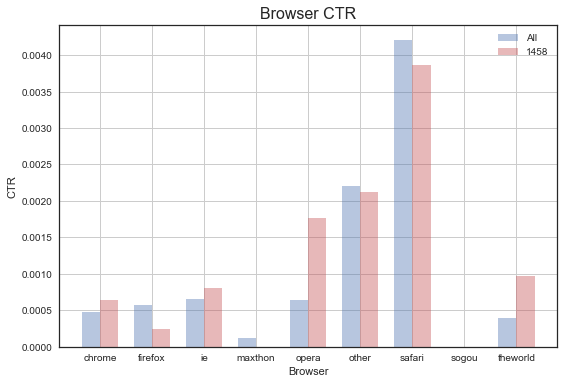

In [35]:
n_groups = 9
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
browser=train_data['click'].groupby([train_data['Browser']]).mean()
plt.bar(index, browser.values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='All')
rects2 = plt.bar(index + bar_width, train_data['click'].groupby([train_data['advertiser'], train_data['Browser']]).mean()[1458], bar_width,
                 alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('Browser')
plt.ylabel('CTR')
plt.title('Browser CTR', fontsize=16)
plt.xticks(index + bar_width / 2, browser.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

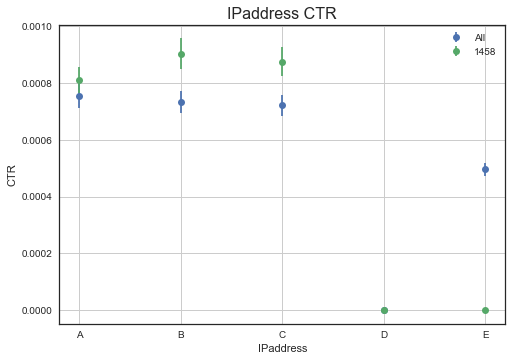

In [36]:
plt.xlabel('IPaddress')
plt.ylabel('CTR')
plt.title('IPaddress CTR', fontsize=16)

a1=train_data['click'][train_data['winbid']==1].groupby([train_data['IPaddress']]).mean()
a2=train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['IPaddress']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
y=list(range(5))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(5),a1.index)
plt.legend(loc='upper right')
plt.show()

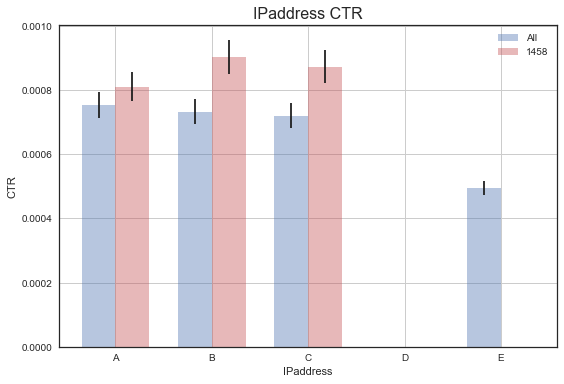

In [39]:
fig = plt.figure()
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
a1=train_data['click'][train_data['winbid']==1].groupby([train_data['IPaddress']]).mean()
a2=train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['IPaddress']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
rects1 = plt.bar(index, a1, bar_width,yerr=err1,
                 alpha=opacity,
                 color='b',
                 label='All')
rects2 = plt.bar(index + bar_width,a2, bar_width,
                 yerr=err2,alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('IPaddress')
plt.ylabel('CTR')
plt.title('IPaddress CTR', fontsize=16)
plt.xticks(index + bar_width / 2, a1.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig('ip_CTR.eps')

In [50]:
train_data[train_data['click']==1][train_data['IPaddress']=='E']

,click,weekday,hour,bidid,logtype,userid,useragent,IP,region,city,...,keypage,advertiser,usertag,winbid,OS,Browser,IPaddress,slotsize,slotprice_range,equipment
1233055,1,3,2,c5485fc3b9355744c0cc2bdd6b5d68a8,1,u_Vh1VO7srD9k8GGn,windows_chrome,240.139.195.*,0,0,...,361e128affece850342293213691a043,3386,"10052,10063,14273,10057,10024,10110",1,windows,chrome,E,728*90,1-10,PC


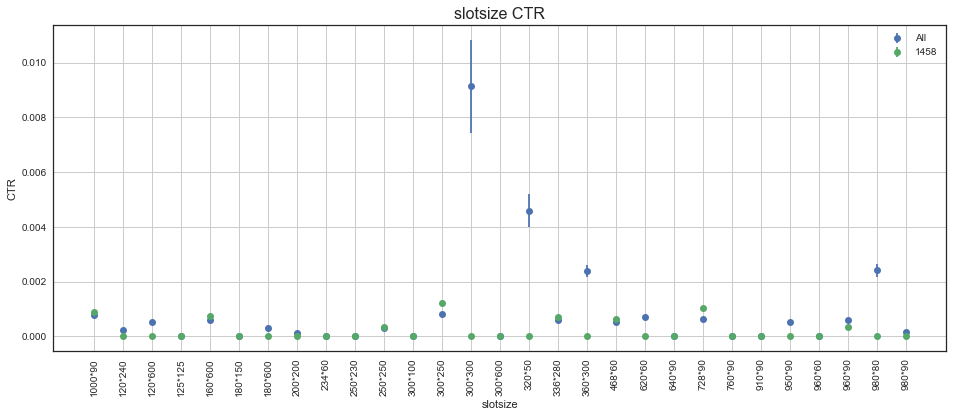

In [40]:
fig = plt.figure(figsize=(16,6)) 
plt.xlabel('slotsize')
plt.ylabel('CTR')
plt.title('slotsize CTR', fontsize=16)
import operator

a1=train_data['click'][train_data['winbid']==1].groupby([train_data['slotsize']]).mean()
a2=[ 0.00087559,0,0,0  ,0.0007314, 0,0,0,0,0, 0.00032996,0,  0.00122627,  0,0,0,0.00072125,0,
        0.0006465 ,0,0,  0.00102003,0,0,0,0,  0.00035932,0,0]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=np.array(np.sqrt(np.array(a2)*(list(map(operator.sub, [1]*29,a2)))))*1.96*np.array(a2)
y=list(range(29))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(29),a1.index,rotation=90)
plt.legend(loc='upper right')
plt.show()
fig.savefig('slotsize_CTR.eps')

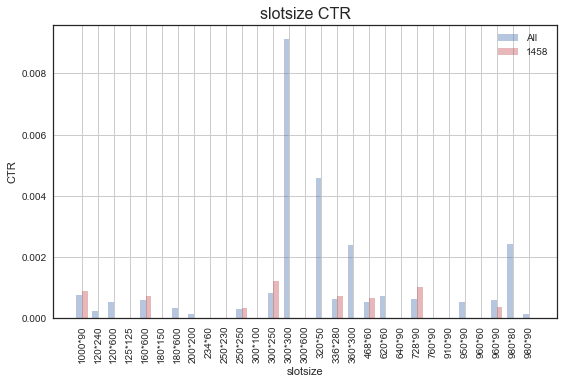

In [41]:
n_groups = 29
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
slotsize = train_data['click'][train_data['winbid']==1].groupby([train_data['slotsize']]).mean()
rects1 = plt.bar(index, slotsize.values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='All')
slotsize_1458=[ 0.00087559,0,0,0  ,0.0007314, 0,0,0,0,0, 0.00032996,0,  0.00122627,  0,0,0,0.00072125,0,
        0.0006465 ,0,0,  0.00102003,0,0,0,0,  0.00035932,0,0]
# slotsize1 = train_data['click'].groupby([train_data['advertiser'], train_data['slotsize']]).mean()[1458]
# sns.barplot(slotsize1.index, slotsize1.values)
rects2 = plt.bar(index + bar_width,slotsize_1458 , bar_width,
                 alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('slotsize')
plt.ylabel('CTR')
plt.title('slotsize CTR', fontsize=16)
plt.xticks(index + bar_width / 2, slotsize.index,rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

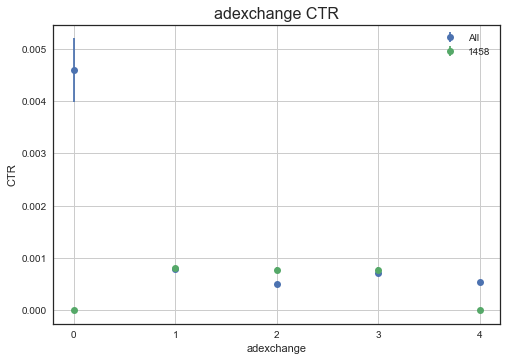

In [42]:
plt.xlabel('adexchange')
plt.ylabel('CTR')
plt.title('adexchange CTR', fontsize=16)


a1=train_data['click'][train_data['winbid']==1].groupby([train_data['adexchange']]).mean()
a2=[0,0.00080319, 0.00077473, 0.00077473,0]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=np.array(np.sqrt(np.array(a2)*(list(map(operator.sub, [1]*29,a2)))))*1.96*np.array(a2)
y=list(range(5))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(5),a1.index)
plt.legend(loc='upper right')
plt.show()

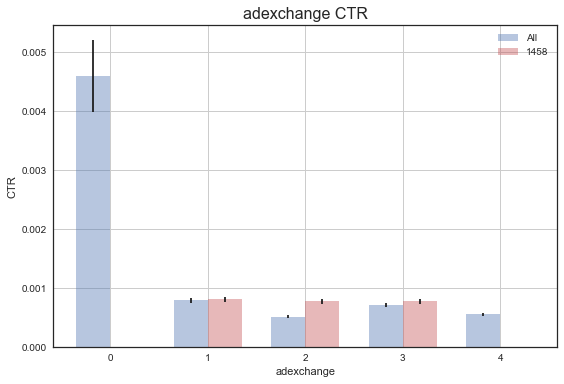

In [43]:
fig = plt.figure()
n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
a1=train_data['click'][train_data['winbid']==1].groupby([train_data['adexchange']]).mean()
a2=[0,0.00080319, 0.00077473, 0.00077473,0]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=np.array(np.sqrt(np.array(a2)*(list(map(operator.sub, [1]*29,a2)))))*1.96*np.array(a2)
rects1 = plt.bar(index, a1, bar_width,yerr=err1,
                 alpha=opacity,
                 color='b',
                 label='All')
rects2 = plt.bar(index + bar_width,a2, bar_width,yerr=err2,
                 alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('adexchange')
plt.ylabel('CTR')
plt.title('adexchange CTR', fontsize=16)
plt.xticks(index + bar_width / 2, a1.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
fig.savefig('adexchange_CTR.eps')

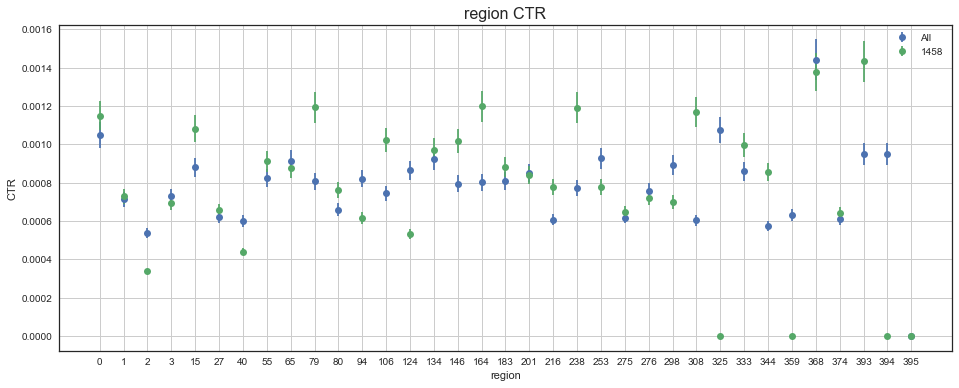

In [44]:
fig = plt.figure(figsize=(16,6)) 
plt.xlabel('region')
plt.ylabel('CTR')
plt.title('region CTR', fontsize=16)

a1=train_data['click'][train_data['winbid']==1].groupby([train_data['region']]).mean()
a2=train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['region']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
y=list(range(35))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(35),a1.index)
plt.legend(loc='upper right')
plt.show()
fig.savefig('region_CTR.eps')

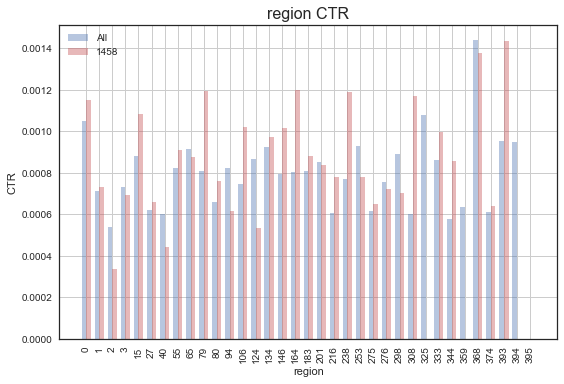

In [45]:
n_groups = 35
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
region=train_data['click'][train_data['winbid']==1].groupby([train_data['region']]).mean()
rects1 = plt.bar(index, region.values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='All')
rects2 = plt.bar(index + bar_width, train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['region']]).mean()[1458], bar_width,
                 alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('region')
plt.ylabel('CTR')
plt.title('region CTR', fontsize=16)
plt.xticks(index + bar_width / 2, region.index,rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['adexchange']]).mean()[1458].values

array([ 0.00080319,  0.00077473,  0.00090581])

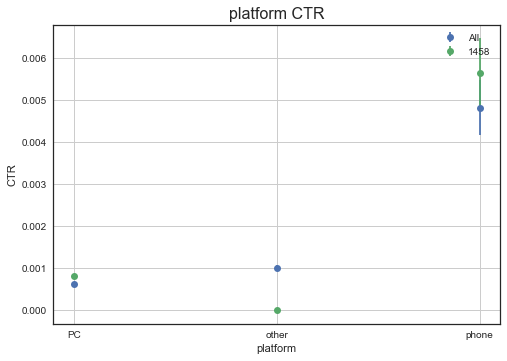

In [47]:
plt.xlabel('platform')
plt.ylabel('CTR')
plt.title('platform CTR', fontsize=16)

a1=train_data['click'][train_data['winbid']==1].groupby([train_data['equipment']]).mean()
a2=train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['equipment']]).mean()[1458]

err1=((np.sqrt(a1*(1-a1)))*1.96*a1).values
err2=((np.sqrt(a2*(1-a2)))*1.96*a2).values
y=list(range(3))
plt.errorbar(y,a1,yerr=err1,fmt='o' ,label='All')
plt.errorbar(y,a2,yerr=err2,fmt='o',label='1458')
plt.grid(True)
plt.xticks(np.arange(3),a1.index)
plt.legend(loc='upper right')
plt.show()

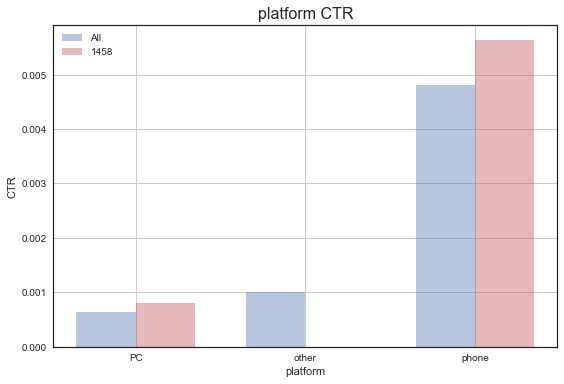

In [48]:
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.4
equipment=train_data['click'][train_data['winbid']==1].groupby([train_data['equipment']]).mean()
plt.bar(index, equipment.values, bar_width,
                 alpha=opacity,
                 color='b',
                 label='All')
rects2 = plt.bar(index + bar_width, train_data['click'][train_data['winbid']==1].groupby([train_data['advertiser'], train_data['equipment']]).mean()[1458], bar_width,
                 alpha=opacity,
                 color='r',
                 label='1458')
plt.xlabel('platform')
plt.ylabel('CTR')
plt.title('platform CTR', fontsize=16)
plt.xticks(index + bar_width / 2, equipment.index)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()